<a href="https://colab.research.google.com/github/gabriel-afd/Simulacao_OpenCIV/blob/main/Simulacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpiv

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from openpiv import pyprocess, piv

In [ ]:
#Leitura do Vídeo

vidcap = cv2.VideoCapture('cavity.mov')

sucesso, image1 = vidcap.read()
cont = 0
U = []
V = []

while sucesso:
  sucesso, image2 = vidcap.read()
  if sucesso:
    x,y,u,v,s2n = piv.simple_piv(image1.sum(axis=2), image2.sum(axis=2), plot=False)
    image1 = image2.copy()
    cont +=1
    U.append(u)
    V.append(v)



In [ ]:
#Cálculo da Velocidade Média

U = np.stack(U)
Umean = np.nanmean(U, axis = 0)
V = np.stack(V)
Vmean = np.nanmean(V, axis = 0)

In [ ]:
#Conversão para m/s

#Obtenção de fps do vídeo
fps = vidcap.get(cv2.CAP_PROP_FPS)

#Tamanho físico de cada pixel
pixel_size=0.0005 #metros por pixel

#Converter velocidade média de pixel/frame para m/s

Ureal = Umean * pixel_size * fps
Vreal = Vmean * pixel_size * fps

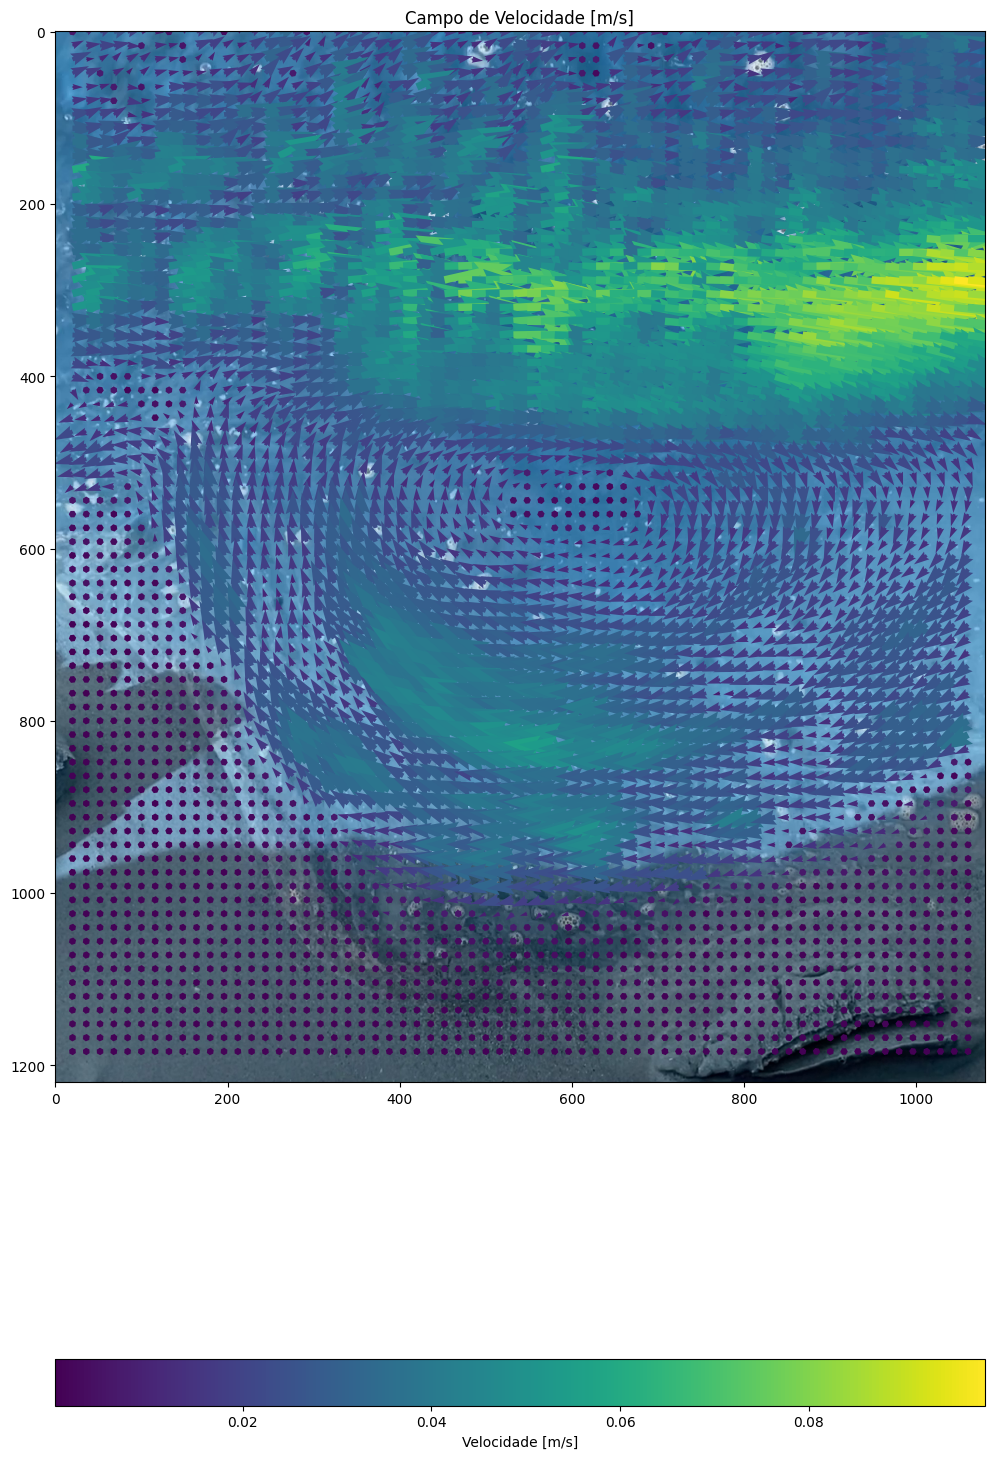

In [ ]:
#Visualização do Campo de Velocidades

magnitude = np.sqrt(Ureal**2 + Vreal**2)

fig, ax=plt.subplots(figsize=(12,24))
ax.imshow(image1, cmap='gray')
cm = ax.quiver(x, y.max() - y, Ureal, Vreal,magnitude, scale=1, width=.008)
plt.title('Campo de Velocidade [m/s]')
plt.colorbar(cm, orientation='horizontal', label='Velocidade [m/s]')